In [8]:
# data exploration

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# load the normalised data
estate_data = pd.read_csv("../data/clean/normalized_table_1nf.csv")

In [11]:
# print first five columns
print(estate_data.head(5))

   refnis    localite  annee periode  nombre_transactions  prix_median  \
0   11001  AARTSELAAR   2010      Q1                 29.0     252000.0   
1   11001  AARTSELAAR   2010      Q2                 25.0     254000.0   
2   11001  AARTSELAAR   2010      Q3                 21.0     255000.0   
3   11001  AARTSELAAR   2010      Q4                 28.0     245000.0   
4   11001  AARTSELAAR   2011      Q1                 23.0     310000.0   

   prix_premier_quartile  prix_troisieme_quartile property_type  
0               225000.0                 290000.0  toute_maison  
1               212000.0                 289000.0  toute_maison  
2               235000.0                 285000.0  toute_maison  
3               210000.0                 312500.0  toute_maison  
4               220000.0                 370000.0  toute_maison  


In [12]:
# print data types of the columns

print (estate_data.dtypes)

refnis                       int64
localite                    object
annee                        int64
periode                     object
nombre_transactions        float64
prix_median                float64
prix_premier_quartile      float64
prix_troisieme_quartile    float64
property_type               object
dtype: object


In [13]:
# create a time-series column => YYYY-QQ (2010-Q1)
estate_data['quarter'] = estate_data['annee'].astype(str) + '-' + estate_data['periode']
print(estate_data.head(5))
print(estate_data.size)

   refnis    localite  annee periode  nombre_transactions  prix_median  \
0   11001  AARTSELAAR   2010      Q1                 29.0     252000.0   
1   11001  AARTSELAAR   2010      Q2                 25.0     254000.0   
2   11001  AARTSELAAR   2010      Q3                 21.0     255000.0   
3   11001  AARTSELAAR   2010      Q4                 28.0     245000.0   
4   11001  AARTSELAAR   2011      Q1                 23.0     310000.0   

   prix_premier_quartile  prix_troisieme_quartile property_type  quarter  
0               225000.0                 290000.0  toute_maison  2010-Q1  
1               212000.0                 289000.0  toute_maison  2010-Q2  
2               235000.0                 285000.0  toute_maison  2010-Q3  
3               210000.0                 312500.0  toute_maison  2010-Q4  
4               220000.0                 370000.0  toute_maison  2011-Q1  
1270740


In [14]:
# aggregate the data for visualisation
# groupe the data by the time-series column
# summary calculation within each group
# for prix_median, compute the mean
# for number of sales, calculate the sum of nombre_transactions per quarter
# final table is aggregated, containing a few rows per quarter displaying the total numbr of sales and average median price

In [15]:
# maison_toute - with 2,3,4 facades excluding apartments
# filter for maison_toute

df_houses = estate_data[estate_data['property_type']=='toute_maison'].copy()

print(df_houses.head(5))
print(df_houses.tail(5))


   refnis    localite  annee periode  nombre_transactions  prix_median  \
0   11001  AARTSELAAR   2010      Q1                 29.0     252000.0   
1   11001  AARTSELAAR   2010      Q2                 25.0     254000.0   
2   11001  AARTSELAAR   2010      Q3                 21.0     255000.0   
3   11001  AARTSELAAR   2010      Q4                 28.0     245000.0   
4   11001  AARTSELAAR   2011      Q1                 23.0     310000.0   

   prix_premier_quartile  prix_troisieme_quartile property_type  quarter  
0               225000.0                 290000.0  toute_maison  2010-Q1  
1               212000.0                 289000.0  toute_maison  2010-Q2  
2               235000.0                 285000.0  toute_maison  2010-Q3  
3               210000.0                 312500.0  toute_maison  2010-Q4  
4               220000.0                 370000.0  toute_maison  2011-Q1  
       refnis   localite  annee periode  nombre_transactions  prix_median  \
34378   93090  VIROINVAL   2

In [16]:

# Group by the quarter and aggregate (sum, mean)
grouped_data_houses = df_houses.groupby('quarter').agg(
    nombre_transactions = ('nombre_transactions','sum'),
    prix_median = ('prix_median','mean')
).reset_index()


In [14]:
print(grouped_data_houses.head)

<bound method NDFrame.head of     quarter  nombre_transactions    prix_median
0   2010-Q1              18476.0  193688.806723
1   2010-Q2              20164.0  195623.637795
2   2010-Q3              20205.0  199003.407692
3   2010-Q4              20026.0  202319.972840
4   2011-Q1              19206.0  203860.600529
..      ...                  ...            ...
56  2024-Q1              19514.0  310042.855072
57  2024-Q2              20893.0  311462.261333
58  2024-Q3              22464.0  318876.709091
59  2024-Q4              23391.0  309040.393862
60  2025-Q1              24899.0  335809.890547

[61 rows x 3 columns]>


In [18]:
# Evolution of price and sale of each property type

# list of property type

property_types = estate_data['property_type'].unique()
print(property_types)

['toute_maison' 'maison_2_3' 'maison_4_plus' 'apartment']


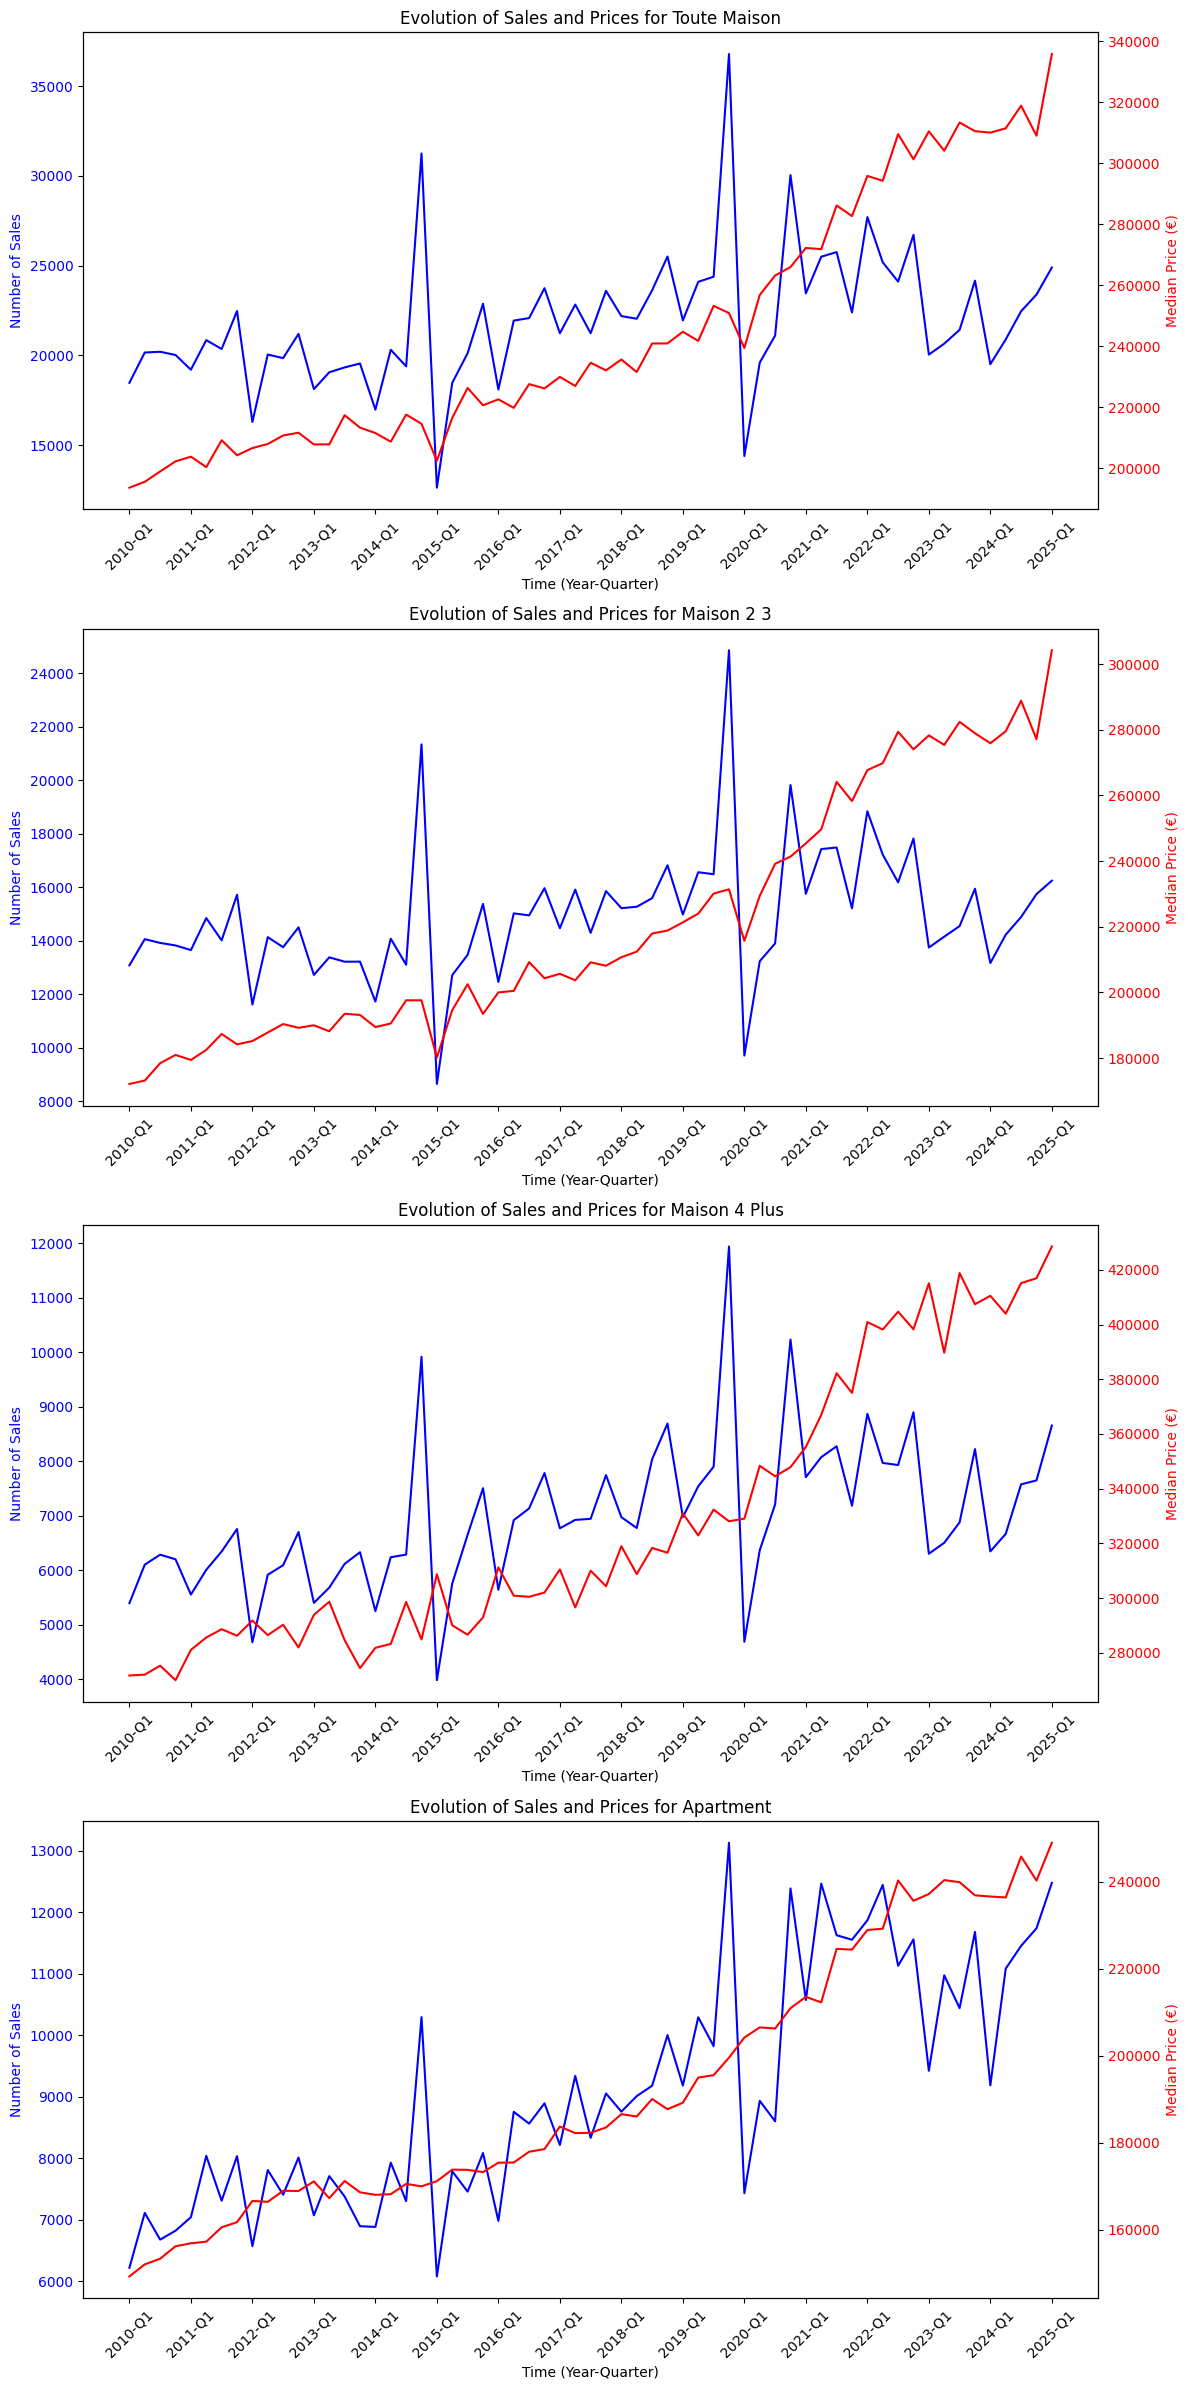

In [ ]:
# create subplots for each property type

fig, axes = plt.subplots(nrows=len(property_types),ncols =1,figsize=(12, 6*len(property_types)))

# loop thrugh each property type and create a plot

for i, prop_type in enumerate(property_types):
    ax=axes[i]

    # filter the data to get the property type
    data_filtered = estate_data[estate_data['property_type']==prop_type].copy()

    #group and aggregate the data
    grouped_data_type = data_filtered.groupby('quarter').agg(
        nombre_transactions=('nombre_transactions','sum'),
        prix_median=('prix_median','mean')
    ).reset_index()

    # create a twin axis for the second y axis
    ax2 = ax.twinx()

    # plot transactions
    ax.plot(grouped_data_type['quarter'],grouped_data_type['nombre_transactions'],color='blue', label='Sales')
    ax.set_ylabel('Number of Sales', color = 'blue')
    ax.tick_params(axis='y',labelcolor='blue')

    #plot median price
    ax2.plot(grouped_data_type['quarter'],grouped_data_type['prix_median'],color='red', label='Median Price (€)')
    ax2.set_ylabel('Median Price (€)', color = 'red')
    ax2.tick_params(axis='y',labelcolor='red')

    # set titles and format x-axis ticks
    ax.set_title(f'Evolution of Sales and Prices for {prop_type.replace("_"," ").title()}')
    ax.set_xlabel('Time (Year-Quarter)')
    ax.set_xticks(ax.get_xticks()[::4])
    ax.tick_params(axis='x', rotation=45)

# save and close the plot
plt.tight_layout()
plt.show()
plt.savefig('../plots/all_property_types_evolution.png')
plt.close()

# To Do: Make the charts interactive using plotly



In [20]:
# visualise data on map
# find most expensive municipalities

import geopandas as gpd

# To Do
# Create an interactive map using dash

In [21]:
# load the administrative boundaries

admin_boundary_path = '../data/raw/sh_statbel_statistical_sectors_31370_20240101.shp/sh_statbel_statistical_sectors_31370_20240101.shp'
admin_boundary = gpd.read_file(admin_boundary_path)


# load the normalised data
estate_data = pd.read_csv("../data/clean/normalized_table_1nf.csv")

In [22]:
admin_boundary.head

<bound method NDFrame.head of       CS01012024                      T_SEC_NL                      T_SEC_FR  \
0      11001A00-            AARTSELAAR-CENTRUM            AARTSELAAR-CENTRUM   
1      11001A01-                  DE LEEUWERIK                  DE LEEUWERIK   
2      11001A020                     BUERSTEDE                     BUERSTEDE   
3      11001A030                      YSSELAAR                      YSSELAAR   
4      11001A042                 KLEINE GRIPPE                 KLEINE GRIPPE   
...          ...                           ...                           ...   
19790  93090G191                BOIS DE NISMES                BOIS DE NISMES   
19791  93090H000                DOURBES-CENTRE                DOURBES-CENTRE   
19792  93090H012  DOURBES ROUTE DE MARIEMBOURG  DOURBES ROUTE DE MARIEMBOURG   
19793  93090H063                         LORET                         LORET   
19794  93090H091               ROCHE A L'HOMME               ROCHE A L'HOMME   

         

In [23]:
admin_boundary.columns

Index(['CS01012024', 'T_SEC_NL', 'T_SEC_FR', 'T_SEC_DE', 'C_NIS7', 'C_NIS6',
       'T_NIS6_NL', 'T_NIS6_FR', 'MUN_DISTR', 'CNIS5_2024', 'T_MUN_NL',
       'T_MUN_FR', 'T_MUN_DE', 'CNIS_ARRD_', 'T_ARRD_NL', 'T_ARRD_FR',
       'T_ARRD_DE', 'CNIS_PROVI', 'T_PROVI_NL', 'T_PROVI_FR', 'T_PROVI_DE',
       'CNIS_REGIO', 'T_REGIO_NL', 'T_REGIO_FR', 'T_REGIO_DE', 'C_COUNTRY',
       'NUTS1_2021', 'NUTS2_2021', 'NUTS3_2021', 'M_AREA_HA', 'M_PERI_M',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [24]:
estate_data.head

<bound method NDFrame.head of         refnis    localite  annee periode  nombre_transactions  prix_median  \
0        11001  AARTSELAAR   2010      Q1                 29.0     252000.0   
1        11001  AARTSELAAR   2010      Q2                 25.0     254000.0   
2        11001  AARTSELAAR   2010      Q3                 21.0     255000.0   
3        11001  AARTSELAAR   2010      Q4                 28.0     245000.0   
4        11001  AARTSELAAR   2011      Q1                 23.0     310000.0   
...        ...         ...    ...     ...                  ...          ...   
127069   93090   VIROINVAL   2021      Q3                  2.0          NaN   
127070   93090   VIROINVAL   2021      Q4                  2.0          NaN   
127071   93090   VIROINVAL   2023      Q2                  2.0          NaN   
127072   93090   VIROINVAL   2023      Q3                  1.0          NaN   
127073   93090   VIROINVAL   2024      Q2                  6.0          NaN   

        prix_premier_

In [25]:
# prepare the data for merging 
# matching fields in administrative boundary and in realestate data 'refnis' // 'CNIS5_2024'

admin_boundary = admin_boundary.rename(columns={'CNIS5_2024':'refnis'})

# enforce string datatype
estate_data['refnis']=estate_data['refnis'].astype(str)
admin_boundary['refnis'] = admin_boundary['refnis'].astype(str)


In [26]:
# aggregate data
# average median price

aggregated_estate_data = estate_data.groupby('refnis').agg(
    average_median_price=('prix_median','mean'),
    total_transactions = ('nombre_transactions','sum')
).reset_index()


In [27]:

# merge the dataframe onto the geodataframe

gdf_merged = admin_boundary.merge(aggregated_estate_data, on='refnis',how='left')

# maintain all the municipaliy data


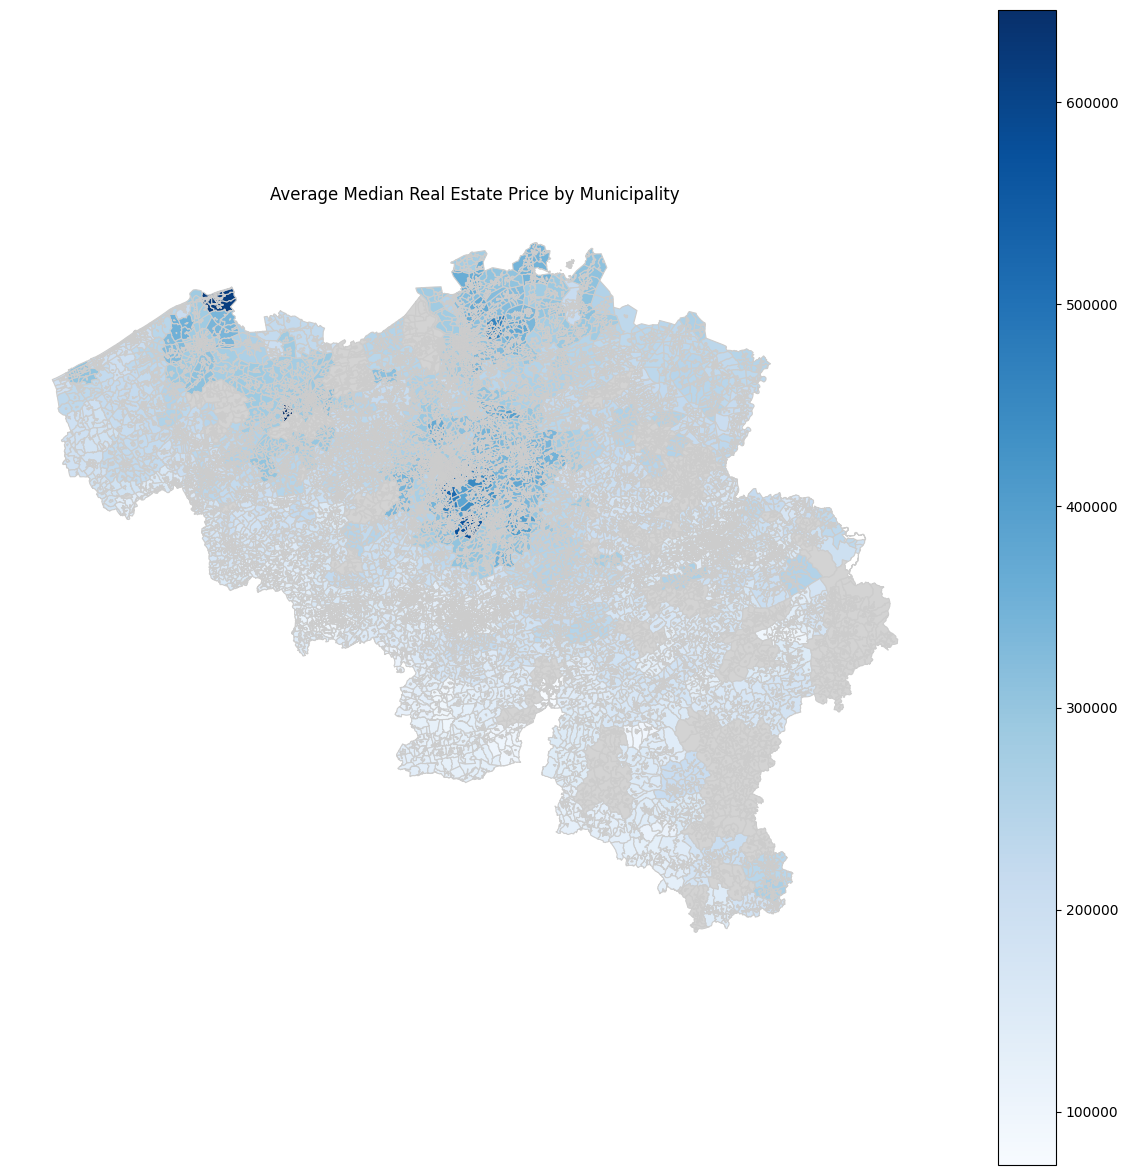

In [28]:
# plot a choropleth
fig, ax = plt.subplots(1,1, figsize=(15,15))

# plot the map using the average median

gdf_merged.plot(column='average_median_price',
                cmap='Blues',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                missing_kwds={'color':'lightgrey'})

# set the title
ax.set_title('Average Median Real Estate Price by Municipality')

# Remove the axes
ax.axis('off')

# save the plot
plt.savefig('../plots/real_estate_map.png')
plt.show()


In [29]:
# number of municipalities

gdf_merged['refnis'].nunique()

581

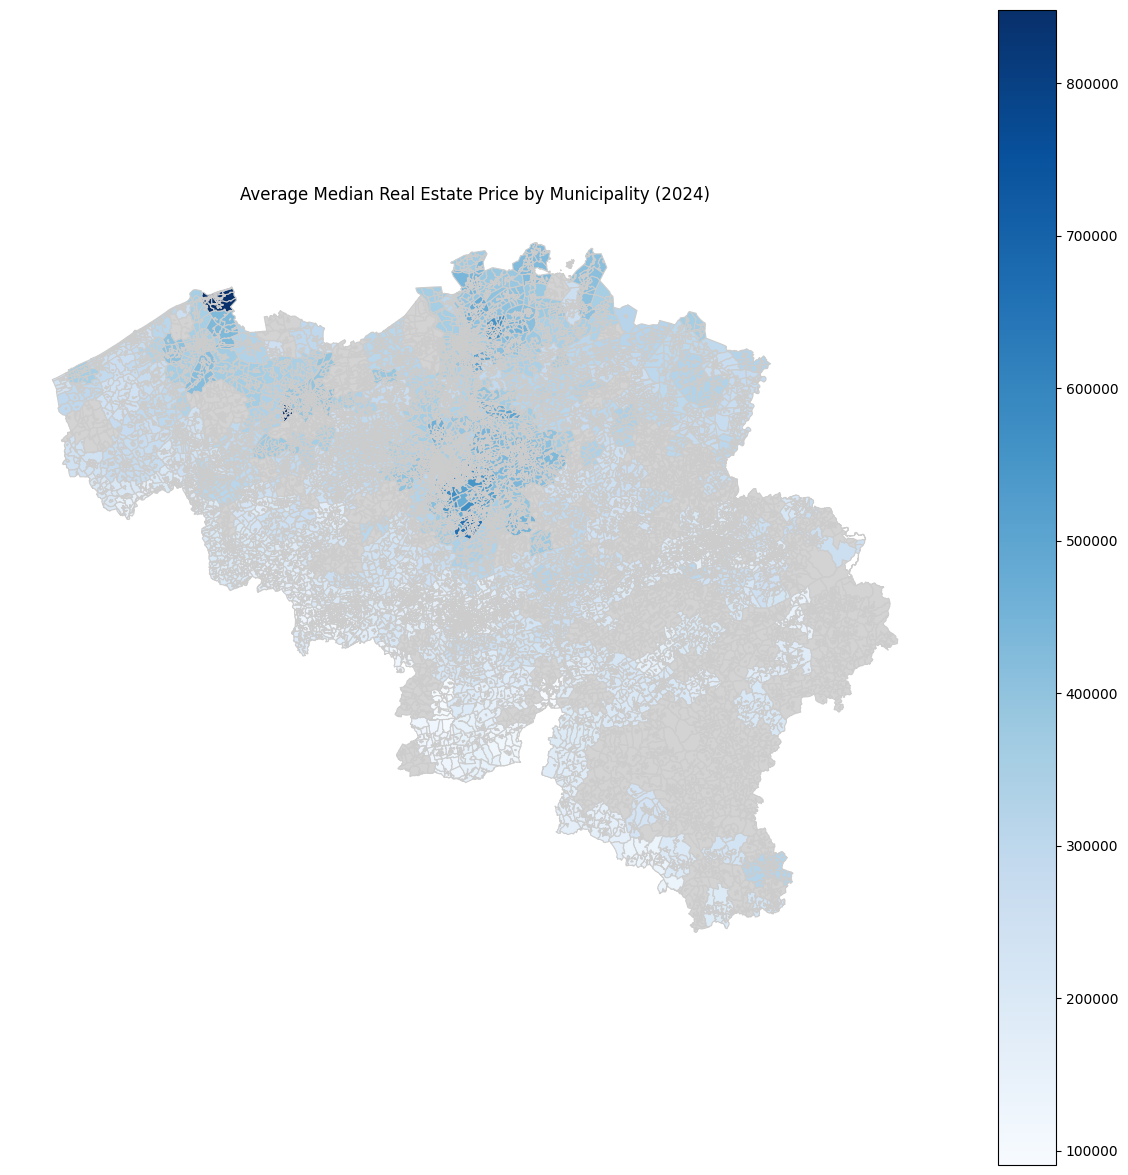

In [30]:
# visualise choropleth to show price per municipality for the year 2024 

# filter data of 2024

df_real_estate  = pd.read_csv("../data/clean/normalized_table_1nf.csv")
   
# filter data for year 2024
df_filtered = df_real_estate[(df_real_estate['annee']==2024)].copy()

# ensure refnis is string
df_filtered['refnis']=df_filtered['refnis'].astype(str)

# group by refnis and calculate the average median prcice and and total transaction for 2024
df_aggregated = df_filtered.groupby('refnis').agg(
    average_median_price=('prix_median','mean'),
    total_transactions=('nombre_transactions','sum')
).reset_index()

#load the shapefile
gdf_boundary = gpd.read_file(admin_boundary_path)

#rename the CNIS5_24 to refnis

gdf_boundary = gdf_boundary.rename(columns={'CNIS5_2024':'refnis'})
gdf_boundary['refnis']=gdf_boundary['refnis'].astype(str)

#merge the aggregated realestate data with geodataframe

gdf_merged = gdf_boundary.merge(df_aggregated,on='refnis',how='left')

# visualise
# plot a choropleth
fig, ax = plt.subplots(1,1, figsize=(15,15), facecolor='none')

# plot the map using the average median

gdf_merged.plot(column='average_median_price',
                cmap='Blues',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                missing_kwds={'color':'lightgrey','label':'No Data for 2024'})

# set the title
ax.set_title('Average Median Real Estate Price by Municipality (2024)')

# Remove the axes
ax.axis('off')

# save the plot
plt.savefig('../plots/real_estate_map_2024.png')
plt.show()


In [31]:
# print list of municipalitieis with no data
no_data_municipalities = gdf_merged[gdf_merged['average_median_price'].isna()]

# list of mun
#T_MUN_FR

#municipality_list = no_data_municipalities[['T_MUN_FR','T_MUN_NL']].values.tolist()
unique_mun_list = set(zip(no_data_municipalities['T_MUN_FR'],no_data_municipalities['T_MUN_NL']))
#print list
if unique_mun_list:
    print(len(unique_mun_list))

    print("the following municipalities have no data for 2024")
    for fr_name,nl_name in unique_mun_list:
        print(f"- {fr_name} ({nl_name})")
    
    else:
        print(" all municipalities have data")

# Not all municipalities have real estate sales/median price data

158
the following municipalities have no data for 2024
- Lokeren (Lokeren)
- Marchin (Marchin)
- Juprelle (Juprelle)
- Biévène (Bever)
- Crisnée (Crisnée)
- Drogenbos (Drogenbos)
- Waimes (Weismes)
- Bastogne (Bastenaken)
- Bullange (Büllingen)
- Stoumont (Stoumont)
- Ouffet (Ouffet)
- Merksplas (Merksplas)
- Wellen (Wellen)
- Sint-Laureins (Sint-Laureins)
- Bertogne (Bertogne)
- Tinlot (Tinlot)
- Sivry-Rance (Sivry-Rance)
- Mont-Saint-Guibert (Mont-Saint-Guibert)
- Beveren (Beveren)
- Neufchâteau (Neufchâteau)
- Paliseul (Paliseul)
- Messines (Mesen)
- Wachtebeke (Wachtebeke)
- Melle (Melle)
- Limbourg (Limburg)
- Incourt (Incourt)
- Fexhe-le-Haut-Clocher (Fexhe-le-Haut-Clocher)
- Modave (Modave)
- Hamoir (Hamoir)
- Braives (Braives)
- Faimes (Faimes)
- Floreffe (Floreffe)
- Ham (Ham)
- Alken (Alken)
- Flobecq (Vloesberg)
- De Pinte (De Pinte)
- Rouvroy (Rouvroy)
- Geer (Geer)
- Herne (Herne)
- Aubel (Aubel)
- Hamois (Hamois)
- Wellin (Wellin)
- Saint-Léger (Saint-Léger)
- Nieuwerkerk

In [32]:
df_real_estate.head()

,refnis,localite,annee,periode,nombre_transactions,prix_median,prix_premier_quartile,prix_troisieme_quartile,property_type
0,11001,AARTSELAAR,2010,Q1,29.0,252000.0,225000.0,290000.0,toute_maison
1,11001,AARTSELAAR,2010,Q2,25.0,254000.0,212000.0,289000.0,toute_maison
2,11001,AARTSELAAR,2010,Q3,21.0,255000.0,235000.0,285000.0,toute_maison
3,11001,AARTSELAAR,2010,Q4,28.0,245000.0,210000.0,312500.0,toute_maison
4,11001,AARTSELAAR,2011,Q1,23.0,310000.0,220000.0,370000.0,toute_maison


In [33]:
# find the top 10 expensive municipalities

df_real_estate  = pd.read_csv("../data/clean/normalized_table_1nf.csv")

# group by refnis and localité
# average price, total sales across all quarters and years
df_aggregated = df_real_estate.groupby(['refnis','localite']).agg(
    average_median_price=('prix_median','mean'),
    total_transactions=('nombre_transactions','sum')
).reset_index()

# sort the data by average median price in descending order
df_sorted = df_aggregated.sort_values(by='average_median_price',ascending=False)

#get top 10 most expensive municipalities
top_10_municipalities = df_sorted.head(10)
print(top_10_municipalities)

# Top most expensve munivcipalities
for index, row in top_10_municipalities.iterrows():
    print(f"{index+1},{row['localite']} (refnis: {row['refnis']})")
    print (f" - Average Median Price: €{row['average_median_price']:.2f}")
    print (f" - Total Transactions: {int(row['total_transactions']):,}\n")

     refnis             localite  average_median_price  total_transactions
269   44064   SINT-MARTENS-LATEM         645670.370787              2899.0
185   31043         KNOKKE-HEIST         616537.712500             23275.0
170   25119                LASNE         572283.333333              4526.0
82    21016                UCCLE         519909.618357             22253.0
75    21009              IXELLES         516422.989071             15563.0
85    21019  WOLUWE-SAINT-PIERRE         484932.962162             10238.0
111   23099             KRAAINEM         474691.130841              4051.0
113   23101   RHODE-SAINT-GENESE         469392.689024              6071.0
115   23103      WEZEMBEEK-OPPEM         466357.084112              3889.0
19    11039              SCHILDE         462122.560284              7986.0
270,SINT-MARTENS-LATEM (refnis: 44064)
 - Average Median Price: €645670.37
 - Total Transactions: 2,899

186,KNOKKE-HEIST (refnis: 31043)
 - Average Median Price: €616537.71
 

In [37]:
# compute growth rate
# identify periods of high growth, market slowdowns and negatibe growth
# Global view of the real estate market. Provide overall trend and sentiment. 
# Limitation: masks divergent trends in each segment

estate_data  = pd.read_csv("../data/clean/normalized_table_1nf.csv")
# Time series column YYYY-QQ
estate_data['quarter'] = estate_data['annee'].astype(str) + '-' + estate_data['periode']

print(estate_data.head)


<bound method NDFrame.head of         refnis    localite  annee periode  nombre_transactions  prix_median  \
0        11001  AARTSELAAR   2010      Q1                 29.0     252000.0   
1        11001  AARTSELAAR   2010      Q2                 25.0     254000.0   
2        11001  AARTSELAAR   2010      Q3                 21.0     255000.0   
3        11001  AARTSELAAR   2010      Q4                 28.0     245000.0   
4        11001  AARTSELAAR   2011      Q1                 23.0     310000.0   
...        ...         ...    ...     ...                  ...          ...   
127069   93090   VIROINVAL   2021      Q3                  2.0          NaN   
127070   93090   VIROINVAL   2021      Q4                  2.0          NaN   
127071   93090   VIROINVAL   2023      Q2                  2.0          NaN   
127072   93090   VIROINVAL   2023      Q3                  1.0          NaN   
127073   93090   VIROINVAL   2024      Q2                  6.0          NaN   

        prix_premier_

In [38]:
# group data by quarter

grouped_data = estate_data.groupby('quarter').agg(
    nombre_transactions =('nombre_transactions','sum'),
    median_price_avg = ('prix_median','mean')
).reset_index()

grouped_data.head(5)

,quarter,nombre_transactions,median_price_avg
0,2010-Q1,43169.0,194202.708223
1,2010-Q2,47438.0,196224.234858
2,2010-Q3,47085.0,201822.151261
3,2010-Q4,46872.0,201853.210956
4,2011-Q1,45452.0,202238.176322


In [39]:
# calculate quarter over quarter growth rate
# use pct_change()
grouped_data['transaction_growth_rate']= grouped_data['nombre_transactions'].pct_change()


In [40]:
# calculate quarter over quarter growth rate for median price
grouped_data['price_growth_rate'] = grouped_data['median_price_avg'].pct_change()


In [41]:
#drop first row with nan (no previus quarter)

grouped_data = grouped_data.dropna()
grouped_data.head()

,quarter,nombre_transactions,median_price_avg,transaction_growth_rate,price_growth_rate
1,2010-Q2,47438.0,196224.234858,0.098890,0.010409
2,2010-Q3,47085.0,201822.151261,-0.007441,0.028528
3,2010-Q4,46872.0,201853.210956,-0.004524,0.000154
4,2011-Q1,45452.0,202238.176322,-0.030295,0.001907
5,2011-Q2,49748.0,202605.571257,0.094517,0.001817


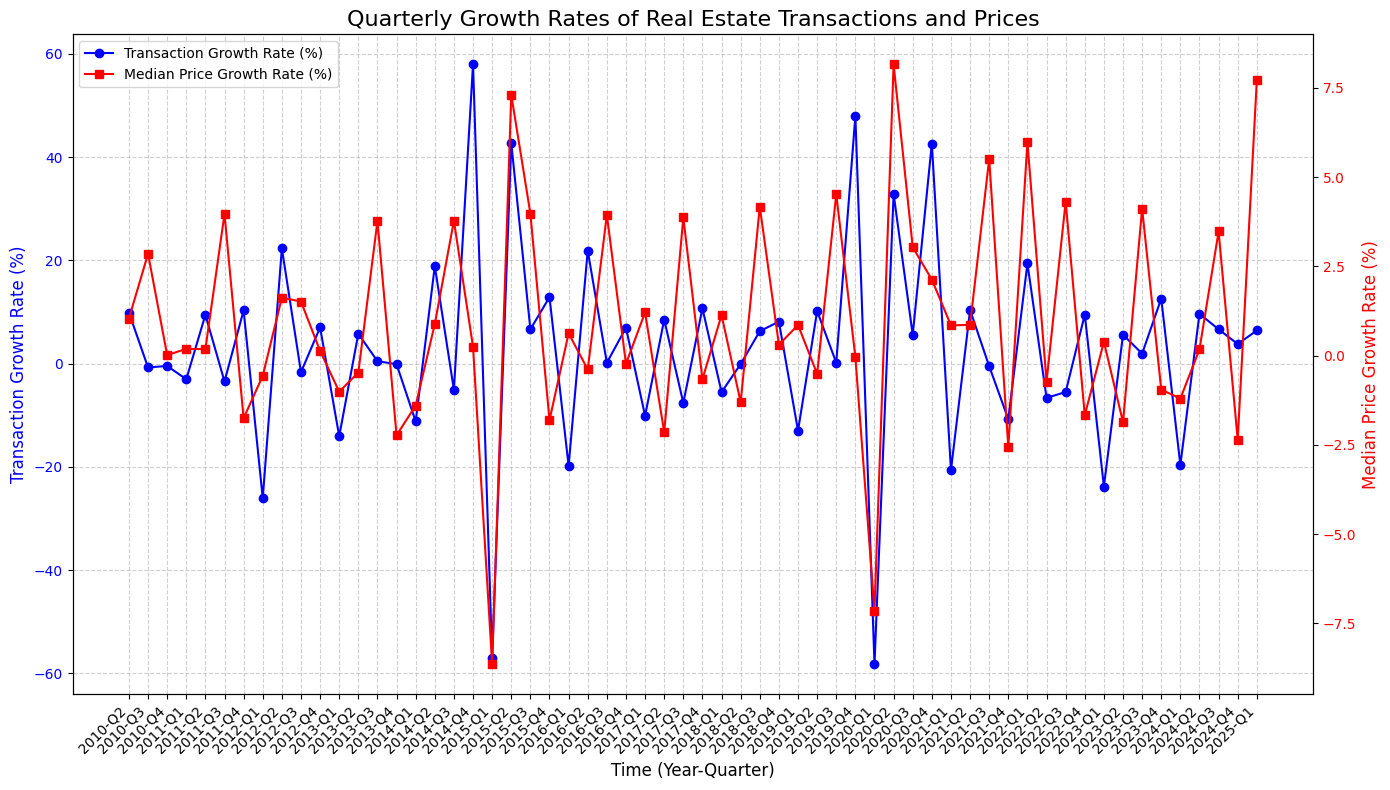

In [42]:
# create visualisation
fig, ax1 = plt.subplots(figsize=(14,8))

# secondary axis
ax2 = ax1.twinx()

# plot transaction growth rate in the first axis
ax1.plot(grouped_data['quarter'],grouped_data['transaction_growth_rate']*100,color = 'blue', marker ='o', linestyle='-',label='Transaction Growth Rate (%)')
ax1.set_ylabel('Transaction Growth Rate (%)',color='blue', fontsize=12)
ax1.tick_params(axis='y',labelcolor='blue')
ax1.grid(True,linestyle='--',alpha=0.6)

# plot the price rate
ax2.plot(grouped_data['quarter'],grouped_data['price_growth_rate']*100,color = 'red', marker ='s', linestyle='-',label='Median Price Growth Rate (%)')
ax2.set_ylabel('Median Price Growth Rate (%)',color='red', fontsize=12)
ax2.tick_params(axis='y',labelcolor='red')


# title and labels

plt.title('Quarterly Growth Rates of Real Estate Transactions and Prices',fontsize=16)
ax1.set_xlabel('Time (Year-Quarter)', fontsize=12)

#control which tick on x axis is displayed
ticks_to_show=ax1.get_xticks()[::1]
ax1.set_xticks(ticks_to_show)
ax1.set_xticklabels(grouped_data['quarter'].iloc[ticks_to_show], rotation=45, ha='right')

# add legend

lines, labels = ax1.get_legend_handles_labels()
lines2,labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plot and save figure

fig.tight_layout()
plt.savefig('../plots/growth_rate_evolution.png')
plt.show()




In [ ]:
# observation:
# Negative growth in mean price and number of sales in 2015 and 2020 Q1
# High price growth rate in 2025 Q1 while there is a modest growth rate in number of sales
# positive trend in the price and number of sales of real estate property


In [ ]:
# To Do: 
# Create a data visualisation function for ease of reuse
# Create Tests
# Compute statistics per real estate type


In [44]:
# Dissolved municipal boundaries
# visualise using folium
# year 2024

import folium
import pandas as pd
import geopandas as gpd

# filteer data of 2024
df_real_estate  = pd.read_csv("../data/clean/normalized_table_1nf.csv")
admin_boundary_path = '../data/raw/sh_statbel_statistical_sectors_31370_20240101.shp/sh_statbel_statistical_sectors_31370_20240101.shp'

print(df_real_estate.head)
   
# filter data for year 2024
df_filtered = df_real_estate[(df_real_estate['annee']==2024)].copy()

# ensure refnis is string
df_filtered['refnis']=df_filtered['refnis'].astype(str)

# group by refnis and calculate the average median prcice and and total transaction for 2024
df_aggregated = df_filtered.groupby('refnis').agg(
    average_median_price=('prix_median','mean'),
    total_transactions=('nombre_transactions','sum')
).reset_index()

#load the shapefile
gdf_boundary = gpd.read_file(admin_boundary_path)
# rename CNIS5_2024 to refnis
gdf_boundary = gdf_boundary.rename(columns={'CNIS5_2024':'refnis'})
gdf_boundary['refnis']=gdf_boundary['refnis'].astype(str)

# dissolve the boundaries to have single polygon per municipality
dissolved_gdf = gdf_boundary.dissolve(by='refnis')


# create a new 'real estate count for each municpality'
real_estate_counts = df_real_estate['refnis'].value_counts().reset_index()
real_estate_counts.columns = ['refnis','real_estate_count']

# merge on refnis: aggregated data and geodatframe
merged_gdf = dissolved_gdf.merge(df_aggregated, on='refnis', how='left')


# reproject to EPSG 4326
gdf_merged = gdf_merged.to_crs("EPSG:4326")

print("creating interactive visualisation....")

# interactive visualisation
m = folium.Map(location=[50.5039, 4.4699], zoom_start=8, tiles='OpenStreetMap')


# create choropleth
folium.Choropleth(

    geo_data=gdf_merged,
    name='choropleth',
    data=gdf_merged,
    columns=['refnis','average_median_price'],
    key_on='feature.properties.refnis',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0,
    legend_name='Average Median Real Estate Price (€)',
    non_fill_color='lightgrey'
).add_to(m)

# add geojson layer with, tooltip for interactivity

style_function = lambda x:{'fillColor' :'transparent', 'color':'transparent', 'weight':0.1, 'fillOpacity':0.1}
highlight_function = lambda x:{'weight' :3, 'fillColor':'yellow', 'fillOpacity':0.5}

tooltip = folium.features.GeoJsonTooltip(
    fields=['T_MUN_FR','T_MUN_NL','average_median_price'],
    aliases=['Municipality (FR)', 'Municipality (NL):', 'Avg Price (€)'],
    labels=True,
    sticky=True
)
folium.GeoJson(
    data=gdf_merged,
    name='municipalities',
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=tooltip
).add_to(m)

# display on jupyter notebook

#m

# save to html
output_file = '../interactive_map/belgium_real_estate_map_municipalities_2024.html'
m.save(output_file)
print("html map saved")

# html map can viewed in the browser
# To Do:
# Folio generated visualisation are too heavy. Options include d3.js,Dash , plotly

<bound method NDFrame.head of         refnis    localite  annee periode  nombre_transactions  prix_median  \
0        11001  AARTSELAAR   2010      Q1                 29.0     252000.0   
1        11001  AARTSELAAR   2010      Q2                 25.0     254000.0   
2        11001  AARTSELAAR   2010      Q3                 21.0     255000.0   
3        11001  AARTSELAAR   2010      Q4                 28.0     245000.0   
4        11001  AARTSELAAR   2011      Q1                 23.0     310000.0   
...        ...         ...    ...     ...                  ...          ...   
127069   93090   VIROINVAL   2021      Q3                  2.0          NaN   
127070   93090   VIROINVAL   2021      Q4                  2.0          NaN   
127071   93090   VIROINVAL   2023      Q2                  2.0          NaN   
127072   93090   VIROINVAL   2023      Q3                  1.0          NaN   
127073   93090   VIROINVAL   2024      Q2                  6.0          NaN   

        prix_premier_

In [6]:
df_real_estate.columns

Index(['refnis', 'localite', 'annee', 'periode', 'nombre_transactions',
       'prix_median', 'prix_premier_quartile', 'prix_troisieme_quartile',
       'property_type'],
      dtype='object')

In [7]:
df_real_estate.head

<bound method NDFrame.head of         refnis    localite  annee periode  nombre_transactions  prix_median  \
0        11001  AARTSELAAR   2010      Q1                 29.0     252000.0   
1        11001  AARTSELAAR   2010      Q2                 25.0     254000.0   
2        11001  AARTSELAAR   2010      Q3                 21.0     255000.0   
3        11001  AARTSELAAR   2010      Q4                 28.0     245000.0   
4        11001  AARTSELAAR   2011      Q1                 23.0     310000.0   
...        ...         ...    ...     ...                  ...          ...   
127069   93090   VIROINVAL   2021      Q3                  2.0          NaN   
127070   93090   VIROINVAL   2021      Q4                  2.0          NaN   
127071   93090   VIROINVAL   2023      Q2                  2.0          NaN   
127072   93090   VIROINVAL   2023      Q3                  1.0          NaN   
127073   93090   VIROINVAL   2024      Q2                  6.0          NaN   

        prix_premier_